In [1]:
# Merger Rate calculations for IMRIPY systems assuming that the DM halos are intact in the merging process.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
import matplotlib.colors as colors
from matplotlib import rcParams
from scipy.interpolate import InterpolatedUnivariateSpline
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t = 13.78e9               #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
ρ_m  = 4e19                #ρ_m=4e19 M☉ Gpc^-3
t_m = 13.78e9             #in units of yr 
σ_eq = 0.005



def merger_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence):
    
    if m_1 < 5 or m_2 < 5:
        return 0
    
    elif m_1 < m_2:
        return 0
    
    else:
        beta = 0.75
        gamma  =  0.65
        delta = -0.89
        a_i_ref =  file['arr_0']   # in units of pc
        m1_ref = 1      # in units of solar mass.
        m2_ref = 1e-3   # in units of solar mass.

        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1)+f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
            return  X/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))

        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
        X = np.geomspace(X_min, X_max, 1000) 
        
        
        if DM_halos_presence == 'False':
            
            def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
                return (0.0965*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0165*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


            def C(m_1,m_2,Δ_1,Δ_2, X):
                return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))

            check_value = t_m/C(m_1,m_2,Δ_1,Δ_2, X)
           
            for i, check_value in enumerate(check_value):
                if check_value < np.min(tm_ref_list):
                    check_value = np.min(tm_ref_list)
                    m = 0.465
                    b = 33.34
                    def j_i(m_1,m_2,Δ_1,Δ_2, X):
                        return (((10**(-b))/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (check_value**(1/m))
                    def j_i_prime(m_1,m_2,Δ_1,Δ_2, X):
                        return (1/m) * (((10**(-b))/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (check_value**(-(m-1)/m))
            
                else:   
                    check_value = check_value
                    g =  InterpolatedUnivariateSpline(tm_ref_list, ji_ref_list, ext = 2, k= 2) # j_i = g(t_m)
                    g_prime = g.derivative()
                    def j_i(m_1,m_2,Δ_1,Δ_2, X):
                        return  g(check_value)
                    def j_i_prime(m_1,m_2,Δ_1,Δ_2, X):
                        return (1/C(m_1,m_2,Δ_1,Δ_2, X)) * g_prime(check_value) 

        
                # Merger rate of  PBH binaries without halos for PBHs mass range of m_min M☉ - m_max M☉.
            def D(m_1, m_2, Δ_1, Δ_2, X):
                return ( 1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))/ np.sqrt(1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))

            
            def j_X(m_1, m_2, Δ_1, Δ_2, X):
                return 0.4108 * np.sqrt(f**2 + 1.1994 * (σ_eq**2)) * D(m_1, m_2, Δ_1, Δ_2, X) * (X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)))

            
            def γ_X(m_1,m_2,Δ_1,Δ_2, X):    
                 return j_i(m_1,m_2,Δ_1,Δ_2, X)/ j_X(m_1, m_2, Δ_1, Δ_2, X)

            
            def integrand(m_1,m_2,Δ_1,Δ_2, X):
                return j_i_prime(m_1,m_2,Δ_1,Δ_2, X) * (1/j_i(m_1,m_2,Δ_1,Δ_2, X)) * ((γ_X(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(- X * ((4*π)/3) * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T)

            
            return  (ρ_m/2) * (((f**2)* (m_1 + m_2))/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2) *   (np.trapz(integrand(m_1,m_2,Δ_1,Δ_2, X),X))
        
        
        else: 
            
            def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
                return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


            def C(m_1,m_2,Δ_1,Δ_2, X):
                return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))

            check_value = t_m/C(m_1,m_2,Δ_1,Δ_2, X)
            
            for i, check_value in enumerate(check_value):
                if check_value < np.min(tm_ref_list):
                    check_value = np.min(tm_ref_list)
                    m = 0.465
                    b = 33.34
                    def j_i(m_1,m_2,Δ_1,Δ_2, X):
                        return (((10**(-b))/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (check_value**(1/m))
                    def j_i_prime(m_1,m_2,Δ_1,Δ_2, X):
                        return (1/m) * (((10**(-b))/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (check_value**(-(m-1)/m))
            
                else:   
                    check_value = check_value
                    g =  InterpolatedUnivariateSpline(tm_ref_list, ji_ref_list, ext = 2, k= 2) # j_i = g(t_m)
                    g_prime = g.derivative()
                    def j_i(m_1,m_2,Δ_1,Δ_2, X):
                        return  g(check_value)
                    def j_i_prime(m_1,m_2,Δ_1,Δ_2, X):
                        return (1/C(m_1,m_2,Δ_1,Δ_2, X)) * g_prime(check_value) 

        
            
            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))
 
            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))
   
            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))

                # Merger rate of  PBH binaries without halos for PBHs mass range of m_min M☉ - m_max M☉.
            def D_halo(m_1, m_2, Δ_1, Δ_2, X):
                return ( 1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))/ np.sqrt(1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))

            
            def j_X_halo(m_1, m_2, Δ_1, Δ_2, X):
                return 0.4087 * np.sqrt(f**2 + 0.2998 * (σ_eq**2)) * D_halo(m_1, m_2, Δ_1, Δ_2, X) * np.sqrt((m_1 + m_2)/ M_binary_initial(m_1, m_2, Δ_1, Δ_2, X)) * (X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)))

            
            def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):    
                return j_i(m_1,m_2,Δ_1,Δ_2, X)/ j_X_halo(m_1, m_2, Δ_1, Δ_2, X)

            
            def integrand_halo(m_1,m_2,Δ_1,Δ_2, X):
                return j_i_prime(m_1,m_2,Δ_1,Δ_2, X) * (1/j_i(m_1,m_2,Δ_1,Δ_2, X)) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(- X * ((4*π)/3) * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T)

            return  (ρ_m/2) * (((f**2)* (m_1 + m_2))/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2) *   (np.trapz(integrand_halo(m_1,m_2,Δ_1,Δ_2, X),X))       



In [2]:
m_1 = 7       #in units of M☉
m_2 = 9      #in units of M☉



y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)




m_min = 5     #in units of M☉
m_max = 100   # in units of M☉

X_min = 1e-15
X_max = 1e5

f = np.geomspace(1e-4, 1, 11)
f_pbh = f/0.85
f_pbh_list = f_pbh.tolist()

m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


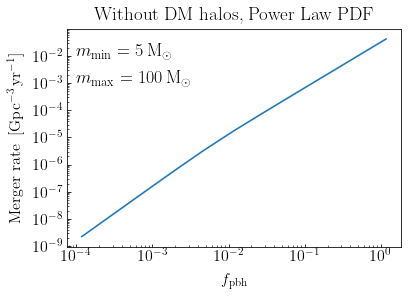

In [3]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

file = np.load('tm_ofj0_PWR_1.npz')
a_i_ref =  file['arr_0']
ji_ref_list = file['arr_1']
tm_ref_list = file['arr_2']



DM_halos_presence = 'False'
Merger_imripy_PWR_1 = np.zeros((11, 11))
merge_imripy_PWR_1 = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    merger_individual = 0
    merger_sum = 0
    
    for i in range(11):
        for j in range(11):
            
            f =  f_pbh*0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if i==j:
                Merger_imripy_PWR_1[i,j] = 0.5 * merger_IMRIPY(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            
            else:
                Merger_imripy_PWR_1[i,j] = merger_IMRIPY( m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)   
            
            merger_individual = merger_individual +  Merger_imripy_PWR_1[i,j]
          
        merger_sum = merger_sum + merger_individual
    
    merge_imripy_PWR_1[z]  = merger_sum
   
        
np.save("merge_imripy_PWR_1", merge_imripy_PWR_1)


plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-4, 1e-2, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 1e-3, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_imripy_PWR_1)
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger rate $\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Without DM halos, Power Law PDF', fontsize = 19, pad = 9)
plt.show()

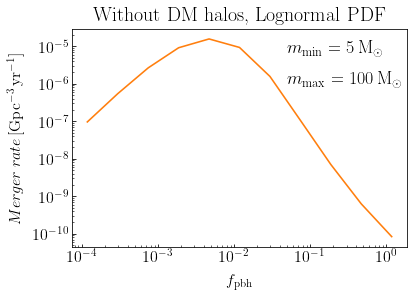

In [4]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


file = np.load('tm_ofj0_Lgnml_1.npz')
a_i_ref =  file['arr_0']
ji_ref_list = file['arr_1']
tm_ref_list = file['arr_2']



DM_halos_presence = 'False'
Merger_imripy_Lognormal_1 = np.zeros((11, 11))
merge_imripy_Lognormal_1 = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    merger_individual = 0
    merger_sum = 0
        
    for i in range(11):
        for j in range(11):
            
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if i==j:
                Merger_imripy_Lognormal_1[i,j] = 0.5 * merger_IMRIPY(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            
            else:
                Merger_imripy_Lognormal_1[i,j] = merger_IMRIPY( m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)   
            
            merger_individual = merger_individual +  Merger_imripy_Lognormal_1[i,j]
    
    
        merger_sum = merger_sum + merger_individual
    
    merge_imripy_Lognormal_1[z]  = merger_sum
   
        
np.save("merge_imripy_Lognormal_1", merge_imripy_Lognormal_1)
    
plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(0.05, 7e-6, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(0.05, 1e-6, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_imripy_Lognormal_1, 'C1')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('$Merger \: rate\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Without DM halos, Lognormal PDF', fontsize = 20, pad = 9)
plt.show()

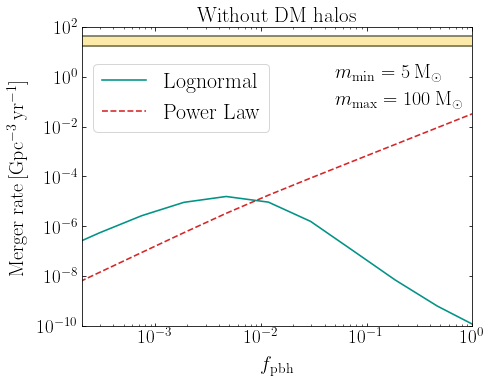

f_pbh_PWR_17.9 = 1.18e+00
f_pbh_PWR_44 = 1.18e+00

f_pbh_Lognormal_17.9 = 1.18e+00
f_pbh_Lognormal_44 = 1.18e+00

f_pbh_PWR_44 = 1.18e+00
f_pbh_Lognormal_44 = 1.18e+00


In [24]:
merge_imripy_PWR_1 = np.load('merge_imripy_PWR_1.npy')
merge_imripy_Lognormal_1 = np.load('merge_imripy_Lognormal_1.npy')



plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(0.05, 1, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(0.05, 0.08, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.loglog(f_pbh_list, merge_imripy_Lognormal_1, '#029386')
plt.loglog(f_pbh_list, merge_imripy_PWR_1, 'C3', linestyle = '--')


plt.xlim(2e-4, 1)
plt.ylim(1e-10, 100)


plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger  rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend([ "Lognormal", "Power Law"], prop = {'size':22}, loc = (0.03, 0.65), 
           facecolor = 'white', fontsize = 110)
plt.title('Without DM halos', fontsize = 21)
plt.savefig('1immergervsfnoDM.pdf', bbox_inches = 'tight')
plt.show()



# Since for BBHs the merger rates detected by LIGO are in range (12 - 213) Gpc⁻3 yr^-1. 
# So, Huang paper follows the method of plotting merger rate vs f_pbh and then picking out the 
# values of f_pbh = f * 0.85 for the values of f having merger rate at 12 Gpc⁻3 yr^-1 and 213 Gpc⁻3 yr^-1.
# And this is how they set a limit to f_pbh as per the mergers seen by LIGO. 

# So, I tried doing the same and see if the values of f and f_pbh used by us so far in the calculations of 
# merger rates are in the same limit or not. Turns out not. 
# In our case f_pbh is having smaller values for both Power Law and Lognoraml PDF.


f_pbh_imripy_PWR_lowerlimit = np.interp(17.9, merge_imripy_PWR_1, f_pbh_list)
f_pbh_imripy_PWR_upperlimit = np.interp(44, merge_imripy_PWR_1, f_pbh_list)
f_pbh_imripy_Lognormal_lowerlimit = np.interp(17.9, merge_imripy_Lognormal_1, f_pbh_list)
f_pbh_imripy_Lognormal_upperlimit = np.interp(44, merge_imripy_Lognormal_1, f_pbh_list)

f_pbh_imripy_PWR_44 = np.interp(44, merge_imripy_PWR_1, f_pbh_list)
f_pbh_imripy_Lognormal_44 = np.interp(44, merge_imripy_Lognormal_1, f_pbh_list)

print("f_pbh_PWR_17.9 =", '%0.2e'%f_pbh_imripy_PWR_lowerlimit)
print("f_pbh_PWR_44 =", '%0.2e'%f_pbh_imripy_PWR_upperlimit)
print('\v')
print("f_pbh_Lognormal_17.9 =", '%0.2e'%f_pbh_imripy_Lognormal_lowerlimit)
print("f_pbh_Lognormal_44 =", '%0.2e'%f_pbh_imripy_Lognormal_upperlimit)
print('\v')
print("f_pbh_PWR_44 =", '%0.2e'%f_pbh_imripy_PWR_44)
print("f_pbh_Lognormal_44 =", '%0.2e'%f_pbh_imripy_Lognormal_44)

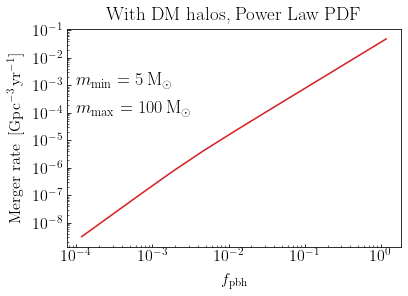

In [6]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

file = np.load('tm_ofj0_PWRhalo_1.npz')
a_i_ref =  file['arr_0']
ji_ref_list = file['arr_1']
tm_ref_list = file['arr_2']




DM_halos_presence = 'True'
Merger_imripy_PWRhalo_1 = np.zeros((11, 11))
merge_imripy_PWRhalo_1 = np.zeros(len(m_1_list))



for z, f_pbh in enumerate(f_pbh_list):
    
    merger_individual = 0
    merger_sum = 0
    
    for i in range(11):
        for j in range(11):
            
            f = f_pbh * 0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if i==j:
                Merger_imripy_PWRhalo_1[i,j] = 0.5 * merger_IMRIPY(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            
            else:
                Merger_imripy_PWRhalo_1[i,j] = merger_IMRIPY( m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)   
            
            merger_individual = merger_individual +  Merger_imripy_PWRhalo_1[i,j]
        
        merger_sum = merger_sum + merger_individual
    
    merge_imripy_PWRhalo_1[z]  = merger_sum
   
        
np.save("merge_imripy_PWRhalo_1.npy",  merge_imripy_PWRhalo_1)


plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-4, 1e-3, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 1e-4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_imripy_PWRhalo_1, 'C3')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger  rate $\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('With DM halos, Power Law PDF', fontsize = 19, pad = 9)
plt.show()

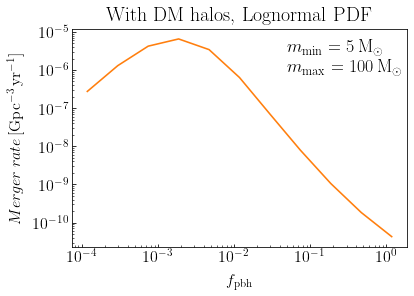

In [7]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


file = np.load('tm_ofj0_Lgnmlhalo_1.npz')
a_i_ref =  file['arr_0']
ji_ref_list = file['arr_1']
tm_ref_list = file['arr_2']



DM_halos_presence = 'True'
Merger_imripy_Lognormalhalo_1 = np.zeros((11, 11))
merge_imripy_Lognormalhalo_1 = np.zeros(len(m_1_list))


for z, f_pbh in enumerate(f_pbh_list):
    
    merger_individual = 0
    merger_sum = 0
        
    for i in range(11):
        for j in range(11):
            
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if i==j:
                Merger_imripy_Lognormalhalo_1[i,j] = 0.5 * merger_IMRIPY(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            
            else:
                Merger_imripy_Lognormalhalo_1[i,j] = merger_IMRIPY( m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)   
            
            merger_individual = merger_individual +  Merger_imripy_Lognormalhalo_1[i,j]
    
    
        merger_sum = merger_sum + merger_individual
    
    merge_imripy_Lognormalhalo_1[z]  = merger_sum
   
        
np.save("merge_imripy_Lognormalhalo_1", merge_imripy_Lognormalhalo_1)
    
plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(0.05, 3e-6, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 18)
plt.text(0.05, 9e-7, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_imripy_Lognormalhalo_1, 'C1')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('$Merger \: rate\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('With DM halos, Lognormal PDF', fontsize = 20, pad = 9)
plt.show()

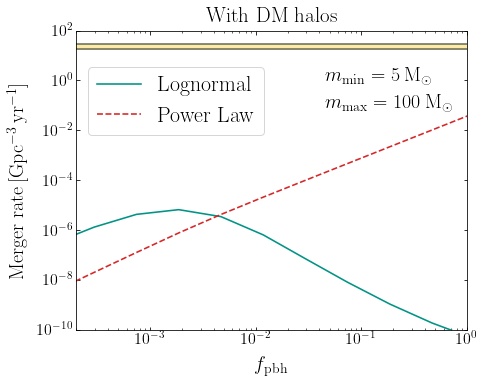

f_pbh_imripy_PWRhalo_17.9 = 1.18e+00
f_pbh_imripy_PWRhalo_44 = 1.18e+00

f_pbh_imripy_Lognormalhalo_17.9 = 1.18e+00
f_pbh_imripy_Lognormalhalo_44 = 1.18e+00

f_pbh_imripy_PWRhalo_44 = 1.18e+00
f_pbh_imripy_Lognormalhalo_44 = 1.18e+00


In [25]:
merge_imripy_Lognormalhalo_1 = np.load('merge_imripy_Lognormalhalo_1.npy')
merge_imripy_PWRhalo_1 = np.load('merge_imripy_PWRhalo_1.npy')



plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(0.045, 1, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(0.045, 0.08, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)



plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_imripy_Lognormalhalo_1, '#029386')
plt.loglog(f_pbh_list, merge_imripy_PWRhalo_1, 'C3', linestyle = '--')

plt.xlim(2e-4, 1)
plt.ylim(1e-10, 100)

plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 30, color = '#6E705E')
plt.axhspan(17.9, 30, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend([ "Lognormal", "Power Law"], prop = {'size':22}, loc = (0.03, 0.65), 
           facecolor = 'white', fontsize = 110)
plt.title('With DM halos', fontsize = 21, pad = 9)
plt.savefig('1himmergervsfDM.pdf', bbox_inches = 'tight')
plt.show()



# Since for BBHs the merger rates detected by LIGO are in range (12 - 213) Gpc⁻3 yr^-1. 
# So, Huang paper follows the method of plotting merger rate vs f_pbh and then picking out the 
# values of f_pbh = f * 0.85 for the values of f having merger rate at 12 Gpc⁻3 yr^-1 and 213 Gpc⁻3 yr^-1.
# And this is how they set a limit to f_pbh as per the mergers seen by LIGO. 

# So, I tried doing the same and see if the values of f and f_pbh used by us so far in the calculations of 
# merger rates are in the same limit or not. Turns out not. 
# In our case f_pbh is having smaller values for both Power Law and Lognoraml PDF.





f_pbh_imripy_PWRhalo_lowerlimit = np.interp(17.9, merge_imripy_PWRhalo_1, f_pbh_list)
f_pbh_imripy_PWRhalo_upperlimit = np.interp(44, merge_imripy_PWRhalo_1, f_pbh_list)
f_pbh_imripy_Lognormalhalo_lowerlimit = np.interp(17.9, merge_imripy_Lognormalhalo_1, f_pbh_list)
f_pbh_imripy_Lognormalhalo_upperlimit = np.interp(44, merge_imripy_Lognormalhalo_1, f_pbh_list)

f_pbh_imripy_PWRhalo_44 = np.interp(44, merge_imripy_PWRhalo_1, f_pbh_list)
f_pbh_imripy_Lognormalhalo_44 = np.interp(44, merge_imripy_Lognormalhalo_1, f_pbh_list)

print("f_pbh_imripy_PWRhalo_17.9 =", '%0.2e'%f_pbh_imripy_PWRhalo_lowerlimit)
print("f_pbh_imripy_PWRhalo_44 =", '%0.2e'%f_pbh_imripy_PWRhalo_upperlimit)
print('\v')
print("f_pbh_imripy_Lognormalhalo_17.9 =", '%0.2e'%f_pbh_imripy_Lognormalhalo_lowerlimit)
print("f_pbh_imripy_Lognormalhalo_44 =", '%0.2e'%f_pbh_imripy_Lognormalhalo_upperlimit)
print('\v')
print("f_pbh_imripy_PWRhalo_44 =", '%0.2e'%f_pbh_imripy_PWRhalo_44)
print("f_pbh_imripy_Lognormalhalo_44 =", '%0.2e'%f_pbh_imripy_Lognormalhalo_44)

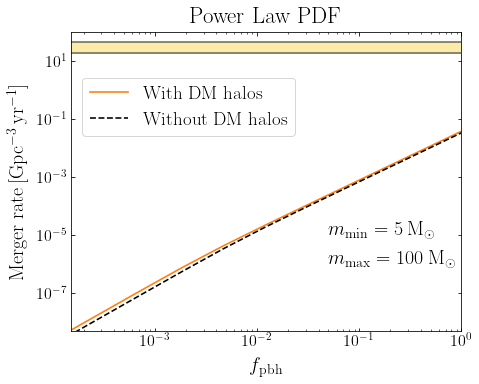

In [26]:
merge_imripy_PWRhalo_1 = np.load('merge_imripy_PWRhalo_1.npy')
merge_imripy_PWR_1 = np.load('merge_imripy_PWR_1.npy')

plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(5e-2, 1e-5, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(5e-2, 1e-6, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_imripy_PWRhalo_1, 'C1')
plt.loglog(f_pbh_list, merge_imripy_PWR_1, 'k', linestyle = '--')

plt.xlim(1.5e-4, 1)
plt.ylim(5e-9, 100)




plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)



plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend(["With DM halos", "Without DM halos"], prop = {'size':19}, loc = (0.03, 0.65), 
           facecolor = 'white', fontsize = 110)
plt.title('Power Law PDF', fontsize = 23, pad = 9)
plt.savefig('1imPWRmergervsf.pdf', bbox_inches = 'tight')
plt.show()

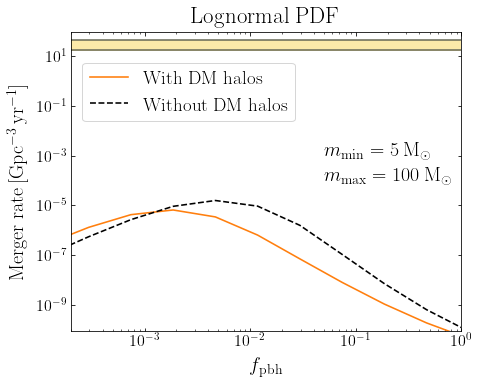

In [27]:
merge_imripy_Lognormalhalo_1 = np.load('merge_imripy_Lognormalhalo_1.npy')
merge_imripy_Lognormal_1 = np.load('merge_imripy_Lognormal_1.npy')

plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(5e-2, 1e-3, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(5e-2, 1e-4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_imripy_Lognormalhalo_1, 'C1')
plt.loglog(f_pbh_list, merge_imripy_Lognormal_1, 'k', linestyle = '--')

plt.xlim(2e-4, 1)
plt.ylim(9e-11, 100)



plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend(["With DM halos", "Without DM halos"], prop = {'size':19}, loc = (0.03,0.7), 
           facecolor = 'white', fontsize = 110)
plt.title('Lognormal PDF', fontsize = 23, pad = 9)
plt.savefig('1imLgnmlmergervsf.pdf', bbox_inches = 'tight')
plt.show()

In [10]:
# I have used the same values as you sent me after understanding the logic.

bin_centres = np.geomspace(1e-2, 96, 11)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])


ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 


deltas = np.diff(bin_edges)




Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()



m_1 = np.geomspace(1e-2, 96, 11)
m_2 = np.geomspace(1e-2, 96, 11)


m_1_list = m_1.tolist()
m_2_list = m_2.tolist()   
    


m_1_list = list(map(lambda x: float(format(x, '.2f')), m_1_list))   
m_2_list = list(map(lambda x: float(format(x, '.2f')), m_2_list)) 



# To save some time I wrote them by hand.
m_1_list = [0.01, 0.03, 0.06, 0.2, 0.4, 1, 3, 7, 16, 39, 96] 
m_2_list = [0.01, 0.03, 0.06, 0.2, 0.4, 1, 3, 7, 16, 39, 96]



Δ_1_list = list(map(lambda x: float(format(x, '.8f')),  Δ_1_list))   
Δ_2_list = list(map(lambda x: float(format(x, '.8f')),  Δ_2_list)) 
    

print('\v')
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)



m_min = 1e-3  #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-20
X_max = 1e5

f = np.geomspace(1e-4, 1, 11)
f_pbh = f/0.85
f_pbh_list = f_pbh.tolist()


m_1 = [0.01, 0.03, 0.06, 0.2, 0.4, 1, 3, 7, 16, 39, 96] M☉

Δ_1 = [0.00949415, 0.02375107, 0.05941695, 0.14864061, 0.37184728, 0.93023298, 2.32712042, 5.82164849, 14.56374623, 36.43344398, 91.14384576]


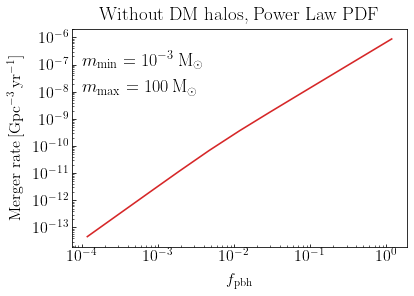

In [11]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

file = np.load('tm_ofj0_PWR_2.npz')
a_i_ref =  file['arr_0']
ji_ref_list = file['arr_1']
tm_ref_list = file['arr_2']



DM_halos_presence = 'False'
Merger_imripy_PWR_2 = np.zeros((11, 11))
merge_imripy_PWR_2 = np.zeros(len(m_1_list))



for z, f_pbh in enumerate(f_pbh_list):
    
    merger_individual = 0
    merger_sum = 0
    
    for i in range(11):
        for j in range(11):
            
            f = f_pbh * 0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 1e-3     #in units of M☉, for PBHs mass range of m_min = 1e-3 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if i==j:
                Merger_imripy_PWR_2[i,j] = 0.5 * merger_IMRIPY(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            
            else:
                Merger_imripy_PWR_2[i,j] = merger_IMRIPY( m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)   
            
            merger_individual = merger_individual +  Merger_imripy_PWR_2[i,j]
          
        merger_sum = merger_sum + merger_individual
    
    merge_imripy_PWR_2[z]  = merger_sum
   
        
np.save("merge_imripy_PWR_2", merge_imripy_PWR_2)


plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-4, 1e-7, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 1e-8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)





plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_imripy_PWR_2, 'C3')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Without DM halos, Power Law PDF', fontsize = 19, pad = 9)
plt.show()

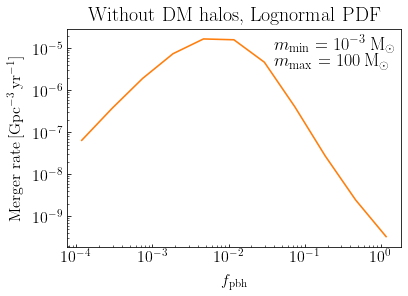

In [12]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


file = np.load('tm_ofj0_Lgnml_2.npz')
a_i_ref =  file['arr_0']
ji_ref_list = file['arr_1']
tm_ref_list = file['arr_2']



DM_halos_presence = 'False'
Merger_imripy_Lognormal_2 = np.zeros((11, 11))
merge_imripy_Lognormal_2 = np.zeros(len(m_1_list))




for z, f_pbh in enumerate(f_pbh_list):
    
    merger_individual = 0
    merger_sum = 0
        
    for i in range(11):
        for j in range(11):
            
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if i==j:
                Merger_imripy_Lognormal_2[i,j] = 0.5 * merger_IMRIPY(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            
            else:
                Merger_imripy_Lognormal_2[i,j] = merger_IMRIPY( m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)   
            
            merger_individual = merger_individual +  Merger_imripy_Lognormal_2[i,j]
    
    
        merger_sum = merger_sum + merger_individual
    
    merge_imripy_Lognormal_2[z]  = merger_sum
   
        
np.save("merge_imripy_Lognormal_2", merge_imripy_Lognormal_2)
    
plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(4e-2, 1e-5, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 18)
plt.text(4e-2, 4e-6, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_imripy_Lognormal_2, 'C1')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('Without DM halos, Lognormal PDF', fontsize = 20, pad = 9)
plt.show()

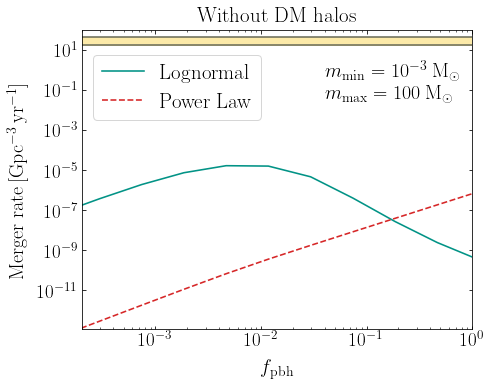

f_pbh_imripy_PWR_17.9 = 1.18e+00
f_pbh_imripy_PWR_44 = 1.18e+00

f_pbh_imripy_Lognormal_17.9 = 1.18e+00
f_pbh_imripy_Lognormal_44  = 1.18e+00

f_pbh_imripy_PWR_44 = 1.18e+00
f_pbh_imripy_Lognormal_44 = 1.18e+00


In [28]:
merge_imripy_PWR_2 = np.load('merge_imripy_PWR_2.npy')
merge_imripy_Lognormal_2 = np.load('merge_imripy_Lognormal_2.npy')



plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which = 'both', right = True, top = True)



plt.text(0.04, 0.5, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 20)
plt.text(0.04, 0.04, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)



plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


plt.loglog(f_pbh_list, merge_imripy_Lognormal_2, '#029386')
plt.loglog(f_pbh_list, merge_imripy_PWR_2, 'C3', linestyle = '--')


plt.xlim(2e-4, 1)
plt.ylim(1.2e-13, 100)


plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend([ "Lognormal", "Power Law"], prop = {'size':21}, loc = (0.03, 0.7), 
           facecolor = 'white', fontsize = 110)
plt.title('Without DM halos', fontsize = 21, pad = 9)
plt.savefig('2immergervsfnoDM.pdf', bbox_inches = 'tight')
plt.show()




# Since for BBHs the merger rates detected by LIGO are in range (12 - 213) Gpc⁻3 yr^-1. 
# So, Huang paper follows the method of plotting merger rate vs f_pbh and then picking out the 
# values of f_pbh = f * 0.85 for the values of f having merger rate at 12 Gpc⁻3 yr^-1 and 213 Gpc⁻3 yr^-1.
# And this is how they set a limit to f_pbh as per the mergers seen by LIGO. 

# So, I tried doing the same and see if the values of f and f_pbh used by us so far in the calculations of 
# merger rates are in the same limit or not. Turns out not. 
# In our case f_pbh is having smaller values for both Power Law and Lognoraml PDF.


f_pbh_imripy_PWR_lowerlimit = np.interp(17.9, merge_imripy_PWR_2, f_pbh_list)
f_pbh_imripy_PWR_upperlimit = np.interp(44, merge_imripy_PWR_2, f_pbh_list)
f_pbh_imripy_Lognormal_lowerlimit = np.interp(17.9, merge_imripy_Lognormal_2, f_pbh_list)
f_pbh_imripy_Lognormal_upperlimit = np.interp(44, merge_imripy_Lognormal_2, f_pbh_list)

f_pbh_imripy_PWR_44 = np.interp(44, merge_imripy_PWR_2, f_pbh_list)
f_pbh_imripy_Lognormal_44 = np.interp(44, merge_imripy_Lognormal_2, f_pbh_list)

print("f_pbh_imripy_PWR_17.9 =", '%0.2e'%f_pbh_imripy_PWR_lowerlimit)
print("f_pbh_imripy_PWR_44 =", '%0.2e'%f_pbh_imripy_PWR_upperlimit)
print('\v')
print("f_pbh_imripy_Lognormal_17.9 =", '%0.2e'%f_pbh_imripy_Lognormal_lowerlimit)
print("f_pbh_imripy_Lognormal_44  =", '%0.2e'%f_pbh_imripy_Lognormal_upperlimit)
print('\v')
print("f_pbh_imripy_PWR_44 =", '%0.2e'%f_pbh_imripy_PWR_44)
print("f_pbh_imripy_Lognormal_44 =", '%0.2e'%f_pbh_imripy_Lognormal_44)

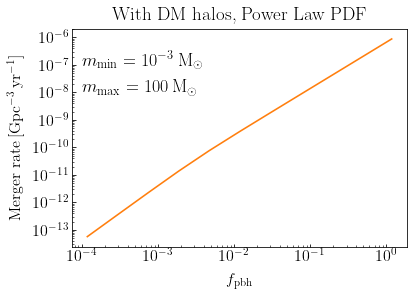

In [14]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

file = np.load('tm_ofj0_PWRhalo_2.npz')
a_i_ref =  file['arr_0']
ji_ref_list = file['arr_1']
tm_ref_list = file['arr_2']


DM_halos_presence = 'True'
Merger_imripy_PWRhalo_2 = np.zeros((11, 11))
merge_imripy_PWRhalo_2 = np.zeros(len(m_1_list))



for z, f_pbh in enumerate(f_pbh_list):
    
    merger_individual = 0
    merger_sum = 0
    
    for i in range(11):
        for j in range(11):
            
            f = f_pbh * 0.85
            
            def P(m): #Powerlaw PBH mass distribution
                α = 1.6
                M = 1e-3     #in units of M☉, for PBHs mass range of m_min = 1e-3 M☉ - m_min = 100 M☉ .
                return ((α-1)/M) * ((m/M)**(-α))

            if i==j:
                Merger_imripy_PWRhalo_2[i,j] = 0.5 * merger_IMRIPY(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            
            else:
                Merger_imripy_PWRhalo_2[i,j] = merger_IMRIPY( m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)   
            
            merger_individual = merger_individual +  Merger_imripy_PWRhalo_2[i,j]
        
        merger_sum = merger_sum + merger_individual
    
    merge_imripy_PWRhalo_2[z]  = merger_sum
   
        

    
np.save("merge_imripy_PWRhalo_2.npy",  merge_imripy_PWRhalo_2)


plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(1e-4, 1e-7, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 18)
plt.text(1e-4, 1e-8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_imripy_PWRhalo_2, 'C1')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('With DM halos, Power Law PDF', fontsize = 19, pad = 9)
plt.show()

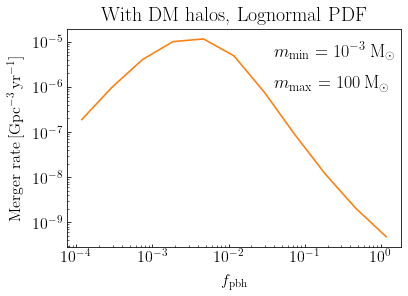

In [15]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.

file = np.load('tm_ofj0_Lgnmlhalo_2.npz')
a_i_ref =  file['arr_0']
ji_ref_list = file['arr_1']
tm_ref_list = file['arr_2']



DM_halos_presence = 'True'
Merger_imripy_Lognormalhalo_2 = np.zeros((11, 11))
merge_imripy_Lognormalhalo_2 = np.zeros(len(m_1_list))



for z, f_pbh in enumerate(f_pbh_list):
    
    merger_individual = 0
    merger_sum = 0
        
    for i in range(11):
        for j in range(11):
            
            f = f_pbh * 0.85
            
            def P(m):                  #Log-Normal PBH mass Distribution
                σ = 0.6
                m_c = 15               #in units of M☉, for PBHs mass range of m_min = 1e-3 M☉ - m_max = 100 M☉ .
                return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-(((np.log(m/m_c))**2)/(2*(σ**2))))

            if i==j:
                Merger_imripy_Lognormalhalo_2[i,j] = 0.5 * merger_IMRIPY(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            
            else:
                Merger_imripy_Lognormalhalo_2[i,j] = merger_IMRIPY( m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)   
            
            merger_individual = merger_individual +  Merger_imripy_Lognormalhalo_2[i,j]
    
    
        merger_sum = merger_sum + merger_individual
    
    merge_imripy_Lognormalhalo_2[z]  = merger_sum
   
        
np.save("merge_imripy_Lognormalhalo_2", merge_imripy_Lognormalhalo_2)
    
plt.figure(figsize = (6, 4))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


plt.text(4e-2, 5e-6, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 18)
plt.text(4e-2, 1e-6, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 18)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_imripy_Lognormalhalo_2, 'C1')
plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 16, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 16, labelpad = 9)
plt.title('With DM halos, Lognormal PDF', fontsize = 20, pad = 9)
plt.show()

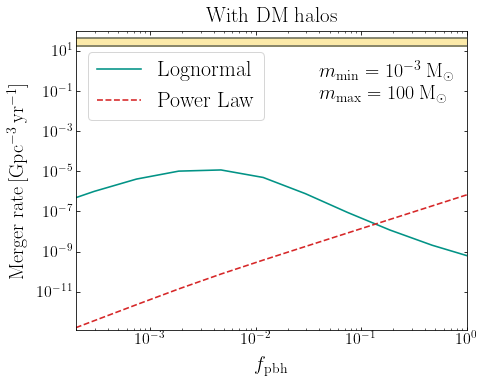

f_pbh_imripy_PWRhalo_17.9 = 1.18e+00
f_pbh_imripy_PWRhalo_44 = 1.18e+00

f_pbh_imripy_Lognormalhalo_17.9 = 1.18e+00
f_pbh_imripy_Lognormalhalo_44 = 1.18e+00

f_pbh_imripy_PWRhalo_44 = 1.18e+00
f_pbh_imripy_Lognormalhalo_44 = 1.18e+00


In [29]:
merge_imripy_PWRhalo_2 = np.load('merge_imripy_PWRhalo_2.npy')
merge_imripy_Lognormalhalo_2 = np.load('merge_imripy_Lognormalhalo_2.npy')



plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)


plt.yscale('log')
plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


plt.loglog(f_pbh_list, merge_imripy_Lognormalhalo_2, '#029386')
plt.loglog(f_pbh_list, merge_imripy_PWRhalo_2, 'C3', linestyle = '--')

plt.text(0.04, 0.5, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 20)
plt.text(0.04, 0.04, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)

plt.xlim(2e-4, 1)
plt.ylim(1.3e-13, 100)



plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend([ "Lognormal", "Power Law"], prop = {'size':22}, loc = (0.03, 0.7), 
           facecolor = 'white', fontsize = 110)
plt.title('With DM halos', fontsize = 21, pad = 9)
plt.savefig('2himmergervsf.pdf', bbox_inches = 'tight')
plt.show()




# Since for BBHs the merger rates detected by LIGO are in range (12 - 213) Gpc⁻3 yr^-1. 
# So, Huang paper follows the method of plotting merger rate vs f_pbh and then picking out the 
# values of f_pbh = f * 0.85 for the values of f having merger rate at 12 Gpc⁻3 yr^-1 and 213 Gpc⁻3 yr^-1.
# And this is how they set a limit to f_pbh as per the mergers seen by LIGO. 

# So, I tried doing the same and see if the values of f and f_pbh used by us so far in the calculations of 
# merger rates are in the same limit or not. Turns out not. 
# In our case f_pbh is having smaller values for both Power Law and Lognoraml PDF.


f_pbh_imripy_PWRhalo_lowerlimit = np.interp(17.9, merge_imripy_PWRhalo_2, f_pbh_list)
f_pbh_imripy_PWRhalo_upperlimit = np.interp(44, merge_imripy_PWRhalo_2, f_pbh_list)
f_pbh_imripy_Lognormalhalo_lowerlimit = np.interp(17.9, merge_imripy_Lognormalhalo_2, f_pbh_list)
f_pbh_imripy_Lognormalhalo_upperlimit = np.interp(44, merge_imripy_Lognormalhalo_2, f_pbh_list)

f_pbh_imripy_PWRhalo_44 = np.interp(44, merge_imripy_PWRhalo_2, f_pbh_list)
f_pbh_imripy_Lognormalhalo_44 = np.interp(44, merge_imripy_Lognormalhalo_2, f_pbh_list)

print("f_pbh_imripy_PWRhalo_17.9 =", '%0.2e'%f_pbh_imripy_PWRhalo_lowerlimit )
print("f_pbh_imripy_PWRhalo_44 =", '%0.2e'%f_pbh_imripy_PWRhalo_upperlimit)
print('\v')
print("f_pbh_imripy_Lognormalhalo_17.9 =", '%0.2e'%f_pbh_imripy_Lognormalhalo_lowerlimit)
print("f_pbh_imripy_Lognormalhalo_44 =", '%0.2e'%f_pbh_imripy_Lognormalhalo_upperlimit)
print('\v')
print("f_pbh_imripy_PWRhalo_44 =", '%0.2e'%f_pbh_imripy_PWRhalo_44)
print("f_pbh_imripy_Lognormalhalo_44 =", '%0.2e'%f_pbh_imripy_Lognormalhalo_44)

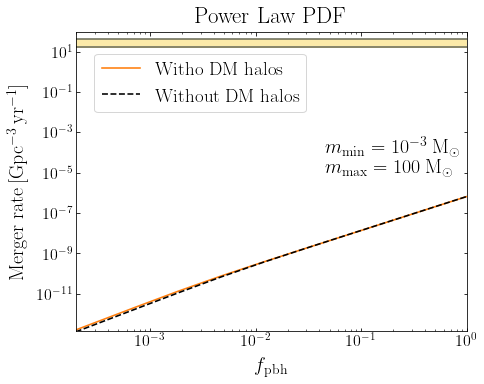

In [30]:
merge_imripy_PWRhalo_2 = np.load('merge_imripy_PWRhalo_2.npy')
merge_imripy_PWR_2 = np.load('merge_imripy_PWR_2.npy')

plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)



plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


plt.loglog(f_pbh_list, merge_imripy_PWRhalo_2, 'C1')
plt.loglog(f_pbh_list, merge_imripy_PWR_2, 'k', linestyle = '--')


plt.text(0.045, 1e-4, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 20)
plt.text(0.045, 1e-5, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)

plt.xlim(2e-4, 1)
plt.ylim(1.5e-13, 100)




plt.axhline(y = 17.9,  color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)



plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend(["Witho DM halos", "Without DM halos"], prop = {'size':19}, loc = (0.045, 0.73), 
           facecolor = 'white', fontsize = 110)
plt.title('Power Law PDF', fontsize = 23, pad = 9)
plt.savefig('2imPWRmergervsf.pdf', bbox_inches = 'tight')
plt.show()

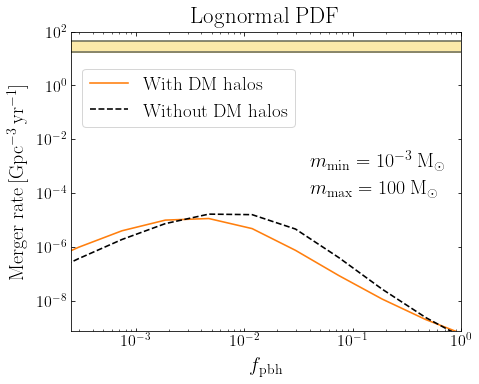

In [31]:
merge_imripy_Lognormalhalo_2 = np.load('merge_imripy_Lognormalhalo_2.npy')
merge_imripy_Lognormal_2 = np.load('merge_imripy_Lognormal_2.npy')



plt.figure(figsize = (7, 5.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(which='both', right=True, top=True)

plt.text(0.04, 1e-3, "$m_\mathrm{{min}} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 20)
plt.text(0.04, 1e-4, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)


plt.rc('lines', linewidth = 1.6)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.loglog(f_pbh_list, merge_imripy_Lognormalhalo_2, 'C1')
plt.loglog(f_pbh_list, merge_imripy_Lognormal_2, 'k', linestyle = '--')

plt.xlim(2.5e-4, 1)
plt.ylim(8e-10, 100)



plt.axhline(y = 17.9, color = '#6E705E')
plt.axhline(y = 44, color = '#6E705E')
plt.axhspan(17.9, 44, 1e-4, 1, color='#FBDD70', alpha=0.6)


plt.xlabel('$f_\mathrm{{pbh}}$', fontsize = 20, labelpad = 9)
plt.ylabel('Merger rate$\,[\mathrm{Gpc^{-3}\,yr^{-1}}]$', fontsize = 20, labelpad = 9)
plt.legend(["With DM halos", "Without DM halos"], prop = {'size':19}, loc = (0.03, 0.68), 
           facecolor = 'white', fontsize = 110)
plt.title('Lognormal PDF', fontsize = 23, pad = 9)
plt.savefig('2himLgnmlmergervsf.pdf', bbox_inches = 'tight')
plt.show()